In [1]:
import pandas as pd
rog=pd.read_csv(r'C:/Users\deepajay\Downloads/smallwikipedia.csv')
print(rog)
rog['Name']
rog['Amount_of_Changes'].describe()

           User_ID                                            Name  \
0     194.210.1.51                                 Bonnet_phrygien   
1              Ske                                 Bonnet_phrygien   
2              Ske                                 Bonnet_phrygien   
3     83.27.202.42                                 Bonnet_phrygien   
4              Med                                 Bonnet_phrygien   
..             ...                                             ...   
993          Jotun                Coup_d'État_du_18_fructidor_an_V   
994  90.22.102.140   Corps_législatif_(Consulat_et_Premier_Empire)   
995        Dinkley                               Cocarde_tricolore   
996        Dinkley                               Cocarde_tricolore   
997        Dinkley  Adoption_par_Louis_XVI_de_la_cocarde_tricolore   

           Date changes Amount_of_Changes Number_1 Number_2  Unnamed: 7  
0    19-10-2004   11:02               163      NaN      NaN         NaN  
1    19-10-

count     998
unique    356
top         2
freq       47
Name: Amount_of_Changes, dtype: object

In [2]:
from collections import Counter
code=Counter(rog.Name)
coss=code.most_common(1000)
print(coss)
x, y=zip(*coss)
x,y=list(x),list(y)
name=pd.DataFrame(x)
sup=pd.DataFrame(y)
cot=pd.concat([name.loc[:,0],sup.loc[:,0]],axis=1)
cot.columns="Name","Coss"
cot.head(20)

[('Bonnet_phrygien', 63), ('Alexandre_François_Marie_de_Beauharnais', 60), ('1er_régiment_de_dragons', 52), ('Bataille_de_Cholet', 37), ('Carle_Vernet', 33), ("Coup_d'État_du_18_fructidor_an_V", 30), ('Caroline_chérie_(1951)', 29), ('Club_de_1789', 29), ('Camille_Borghèse', 28), ('Adoption_par_Louis_XVI_de_la_cocarde_tricolore', 27), ('Affaire_Réveillon', 25), ('André_Joseph_Abrial', 25), ('12e_régiment_de_hussards', 25), ('10e_régiment_de_hussards', 25), ('13e_régiment_de_hussards', 24), ('Complot_révolutionnaire_nantais_contre_les_modérés', 22), ('Bien_national', 20), ('Citoyen_actif', 19), ("Complot_de_l'Œillet", 18), ('11e_régiment_de_hussards_(France)', 18), ('Corps_législatif_(Consulat_et_Premier_Empire)', 17), ('Affaire_de_Nancy', 17), ('Augustin-Jean-Charles_Clément', 17), ('Contributions_directes', 16), ("Armée_de_l'Ouest", 16), ('Charles_Antoine_Chasset', 16), ('Bon_Albert_Briois_de_Beaumetz', 15), ('Conspiration_des_poignards', 15), ('Achille_Libéral_Treilhard', 14), ('Choua

,Name,Coss
0,Bonnet_phrygien,63
1,Alexandre_François_Marie_de_Beauharnais,60
2,1er_régiment_de_dragons,52
3,Bataille_de_Cholet,37
4,Carle_Vernet,33
5,Coup_d'État_du_18_fructidor_an_V,30
6,Caroline_chérie_(1951),29
7,Club_de_1789,29
8,Camille_Borghèse,28
9,Adoption_par_Louis_XVI_de_la_cocarde_tricolore,27


In [3]:
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go 
init_notebook_mode(connected=True)
val=cot.Name
fig={ 'data':[{'values':cot.iloc[:, 1], 'labels':val, 'name':'Name','hoverinfo':'label+percent+name'
            , 'hole':.4, 'type':'pie'}],
     'layout':{
         'title':"log of 1000 wikipedia", 'annotations':[{'font':{'size': 20}, 'showarrow':False,'text':'Total',
                                'x': .5,'y': .5}]
     }
}
iplot(fig)

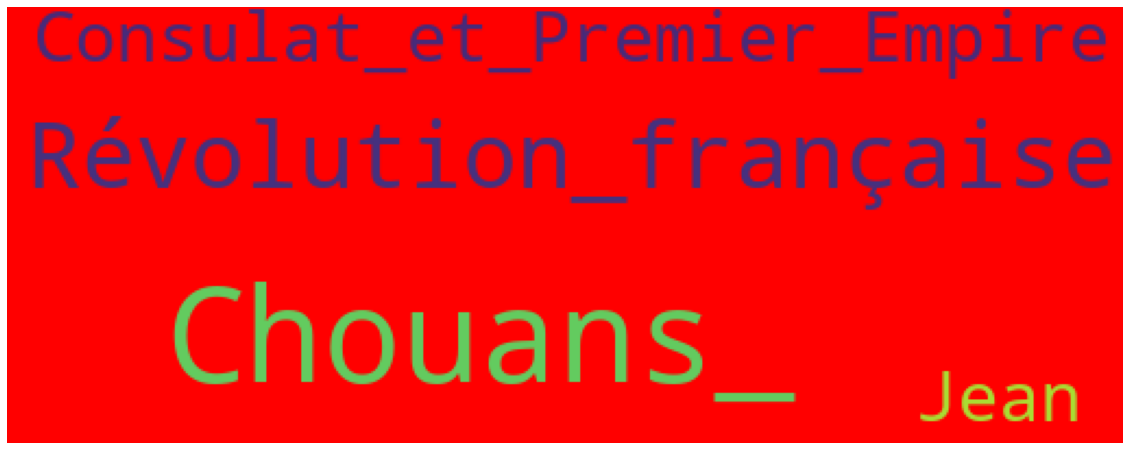

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as mlp
periods=rog.loc[(rog['Date']>='19-10-2004')&(rog['Date']<='23-07-2008')]
items=periods.Name
mlp.subplots(figsize=(20,10))
wordcloud=WordCloud(background_color="red",width=512,height=200).generate("".join(items))
mlp.imshow(wordcloud)
mlp.axis('off')
mlp.show()